In [1]:
# this cell of bloc of code was used for the final classification prediction model
# import numpy, pandas, and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# read the data
studentData = pd.read_csv('StudentData.csv',encoding = 'ISO-8859-1')
ratesData = pd.read_csv('pertusisRates2010_2015.csv',encoding = 'ISO-8859-1')
# observing student data we need to drop data on nMMR and nPolio since we are interested only in Pertussis outbreaks
# also, we need to drop data on 2015 year as well as years 2000-2009 since we are only interested in 2010-2014 years
# lastly, we need to sort the data's rows according to years and county from lowest to highest
studentData = studentData.drop(['schoolType','SCHOOL','school_code','nMMR', 'nPolio', 'nPBE', 'nPME'], axis=1)
for i in range(2000,2010):
    studentData = studentData[studentData.year != i]
studentData = studentData[studentData.year != 2015]
# sort the student data frame according to county and year
studentData = studentData.sort_values(by=['COUNTY', 'year'])
# on rates data we will drop first row as it contains cases for entire California
ratesData = ratesData.iloc[1:]
# now we calculate the unvaccinated number of students for all counties
studentData['not_vaccinated'] = studentData['n'] - studentData['nDTP']
# next we create the new data frame that represents the student data for years 2010 to 2014
cols = ['county','students','vaccinated','not_vaccinated','year','cases']
df = pd.DataFrame( columns = cols)
yrs = [2010,2011,2012,2013,2014]
for x in yrs:
    new_df = studentData[studentData['year']==x]
    for i in sorted(set(new_df['COUNTY'].tolist())):
        new_df2 = new_df[new_df['COUNTY']==i]
        df = df.append({'county' : i , 
                        'students' : new_df2['n'].sum() ,
                        'vaccinated' : new_df2['nDTP'].sum() ,
                        'not_vaccinated' : new_df2['not_vaccinated'].sum() ,
                        'year' : x
                       } ,ignore_index=True)
# sort the data frame according to county and year
df = df.sort_values(by=['county', 'year'])
# to account for missing ALPINE county for 2014 year, we add values of zero for the year 2014
df = df.append({'county' : 'ALPINE' , 'students' : 0, 'vaccinated' : 0, 'not_vaccinated' : 0, 'year' : 2014, 'cases' : 0 } , ignore_index=True)
df = df.sort_values(by=['county', 'year'])
# now we calculate the vaccinated and unvaccinated data for the year 2014
vaccinated_2014 = []
not_vaccinated_2014 = []
for i in range(len(df['year'])):
    if df['year'].tolist()[i] == 2014:
        vaccinated_2014.append(df['vaccinated'].tolist()[i])
        not_vaccinated_2014.append(df['not_vaccinated'].tolist()[i])     
# now we drop data for 2014 as we do not need it from here
df = df[df.year != 2014]
# we drop the rates data of the years 2010 to 2014 and drop the cases, and store it to a new dataframe
rates_new = ratesData.drop(['Rate2010','Rate2011','Rate2012', 'Rate2013','Rate2014','Cases2014'], axis=1)
# get the transpose, used for the average calculation in the loop
conv = rates_new.T
l = []
for i in conv:
    for w in range(1,len(conv[i].tolist())):
        l.append(conv[i].tolist()[w])
# set the dataframe's cases column to the list containing cases per year for each county    
df['cases'] = l
# define variables used in the averages calculations
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g = 0
h = 0
u = 0
t = 0
y = 0
o = 0
res1 = 0
res2 = 0
res3 = 0
counties = []
avg_cases = []
avg_vacc = []
avg_notVacc = []
# loop through and calculate the averages over the 2010 to 2013 years
for i in range(0, len(df['cases']), 4):
    counties.append(df['county'].tolist()[i])
    # vaccinated data 
    a = df['vaccinated'].tolist()[i]
    b = df['vaccinated'].tolist()[i+1]
    c = df['vaccinated'].tolist()[i+2]
    d = df['vaccinated'].tolist()[i+3]
    # unvaccinated data
    e = df['not_vaccinated'].tolist()[i]
    f = df['not_vaccinated'].tolist()[i+1]
    g = df['not_vaccinated'].tolist()[i+2]
    h = df['not_vaccinated'].tolist()[i+3]
    # cases data
    u = df['cases'].tolist()[i]
    t = df['cases'].tolist()[i+1]
    y = df['cases'].tolist()[i+2]
    o = df['cases'].tolist()[i+3]
    # averages calculation
    res1 = round((a+b+c+d)/4)
    res2 = round((e+f+g+h)/4)
    res3 = round((u+t+y+o)/4)
    # append results to the lists
    avg_vacc.append(res1)  
    avg_notVacc.append(res2)
    avg_cases.append(res3)

In [2]:
# operating on the previous block of code, we will calculate the ratios of vaccinated vs unvaccinated
ratio = []
for i in range(len(avg_vacc)):
    ratio.append(avg_cases[i] / avg_notVacc[i] )

Text(0,0.5,'Average Cases')

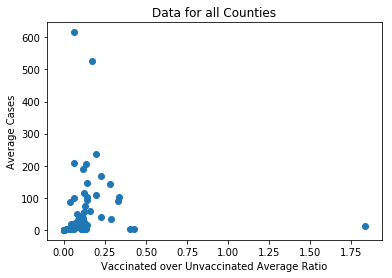

In [3]:
# plot the results, observing the data it follows a non-linear model with few outliers
import matplotlib.pyplot
import pylab
matplotlib.pyplot.scatter(ratio,avg_cases)
plt.title('Data for all Counties')
plt.xlabel('Vaccinated over Unvaccinated Average Ratio')
plt.ylabel('Average Cases')